# Data Analysis Lab 1  
**Dataset:** Personal Cars Classifieds (Kaggle)

This notebook demonstrates basic data inspection, cleaning, feature engineering, analysis, and visualization using a real-world dirty dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


## Load Dataset

The dataset is loaded from Kaggle. Since this is real-world data, missing and inconsistent values are expected.


In [2]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("mirosval/personal-cars-classifieds")

# Load CSV file
df = pd.read_csv(f"{path}/all_anonymized_2015_11_2017_03.csv", low_memory=False)
df.head()


/Users/kjv/SE/Projects/Playground/ML/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,NaN,man,5.0,7.0,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,NaN,man,5.0,5.0,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,NaN,man,5.0,5.0,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


## Data Inspection

We inspect the structure, data types, and missing values to understand the quality of the dataset.


In [3]:
print("="*60)
print("Dataset Info")
print("="*60)
df.info()

print("\n" + "="*60)
print("Statistical Summary")
print("="*60)
df.describe(include="all")


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             float64
 9   transmission         object 
 10  door_count           float64
 11  seat_count           float64
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(8), object(8)
memory usage: 433.7+ MB

Statistical Summary


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
count,3033997,2419551,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,2429998,209501,536105.000000,2811282,2.462846e+06,2.265813e+06,1705306,3552912,3552912,3.552912e+06
unique,46,1012,NaN,NaN,NaN,NaN,9,14,NaN,2,NaN,NaN,5,3552912,3355057,NaN
top,skoda,octavia,NaN,NaN,NaN,NaN,other,black,NaN,man,NaN,NaN,gasoline,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,NaN
freq,313830,129563,NaN,NaN,NaN,NaN,1964289,42931,NaN,2021990,NaN,NaN,902222,1,197856,NaN
mean,NaN,NaN,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,NaN,NaN,2021.472590,NaN,4.052180e+00,4.869694e+00,NaN,NaN,NaN,1.625812e+06
std,NaN,NaN,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,NaN,NaN,140.476724,NaN,9.911850e-01,1.212611e+00,NaN,NaN,NaN,2.025622e+09
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,2015.000000,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,4.000000e-02
25%,NaN,NaN,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,NaN,NaN,2017.000000,NaN,4.000000e+00,5.000000e+00,NaN,NaN,NaN,1.295340e+03
50%,NaN,NaN,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,NaN,NaN,2017.000000,NaN,4.000000e+00,5.000000e+00,NaN,NaN,NaN,7.364910e+03
75%,NaN,NaN,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,NaN,NaN,2018.000000,NaN,5.000000e+00,5.000000e+00,NaN,NaN,NaN,1.628423e+04


## Missing Values Before Cleaning

We check how many missing values exist in each column before applying any cleaning steps.


In [4]:
print("=" * 60)
print("Missing values BEFORE cleaning")
print("=" * 60)

missing_before = df.isna().sum()
missing_before[missing_before > 0].sort_values(ascending=False)


Missing values BEFORE cleaning


color_slug             3343411
stk_year               3016807
fuel_type              1847606
seat_count             1287099
model                  1133361
body_type              1122914
door_count             1090066
engine_displacement     743414
transmission            741630
engine_power            554877
maker                   518915
manufacture_year        370578
mileage                 362584
dtype: int64

## Data Cleaning - Dropping High-Missing Columns

Columns with more than 60% missing values are dropped as they provide limited analytical value.
This threshold balances data retention with quality.

In [5]:
# Identify columns with more than 60% missing values
missing_percentage = (df.isna().sum() / len(df)) * 100
cols_to_drop = missing_percentage[missing_percentage > 60].index.tolist()

print("=" * 60)
print(f"Dropping {len(cols_to_drop)} columns with >60% missing values")
print("=" * 60)
print(cols_to_drop)

# Drop the identified columns
df = df.drop(columns=cols_to_drop)

print(f"\nDataset shape after dropping: {df.shape}")

Dropping 2 columns with >60% missing values
['color_slug', 'stk_year']

Dataset shape after dropping: (3552912, 14)


## Data Cleaning - Text Normalization

Text columns are normalized to avoid inconsistencies caused by casing and extra spaces.
Only existing columns are processed to prevent errors.


In [6]:
# Function to normalize text columns
def normalize_text(col):
    return (
        col.astype(str)
           .str.lower()
           .str.strip()
           .replace("nan", np.nan)
    )

# Categorical text columns to normalize
text_columns = [
    "maker", "model", "fuel_type",
    "body_type", "color_slug", "transmission"
]

# Normalize only existing columns
for col in text_columns:
    if col in df.columns:
        df[col] = normalize_text(df[col])


## Data Cleaning - Handling Missing Maker and Model

Missing values are filled when a reliable relationship exists between model and maker.
Rows where both maker and model are missing are dropped as they lack essential vehicle identification.


In [7]:
# Fill missing maker using model → maker relationship
model_to_maker = (
    df.dropna(subset=["model", "maker"])
      .groupby("model")["maker"]
      .agg(lambda x: x.mode().iloc[0])
)

missing_maker = df["maker"].isna() & df["model"].notna()
df.loc[missing_maker, "maker"] = df.loc[missing_maker, "model"].map(model_to_maker)

# Fill missing model using maker → most common model
maker_to_model = (
    df.dropna(subset=["maker", "model"])
      .groupby("maker")["model"]
      .agg(lambda x: x.mode().iloc[0])
)

missing_model = df["model"].isna() & df["maker"].notna()
df.loc[missing_model, "model"] = df.loc[missing_model, "maker"].map(maker_to_model)

# Drop rows where both maker and model are still missing
both_missing = df["maker"].isna() & df["model"].isna()
rows_before = len(df)
df = df[~both_missing].copy()
rows_dropped = rows_before - len(df)

print("=" * 60)
print("Maker and model cleaned with alignment preserved")
print(f"Dropped {rows_dropped} rows with both maker and model missing")
print("=" * 60)


Maker and model cleaned with alignment preserved
Dropped 518915 rows with both maker and model missing


## Data Cleaning - Cleaning Other Categorical Fields

For other categorical columns, missing values are filled using the most frequent (mode) value.
This approach is simple and effective for enumerated fields.


In [8]:
categorical_fill_cols = [
    "fuel_type", "body_type",
    "transmission", "color_slug"
]

for col in categorical_fill_cols:
    if col in df.columns and df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode(dropna=True)[0])


## Data Cleaning - Cleaning Numerical Fields

Numerical columns are filled using median values to reduce the effect of extreme outliers.


In [9]:
numerical_fill_cols = [
    "mileage", "manufacture_year",
    "engine_displacement", "engine_power",
    "door_count", "seat_count",
    "stk_year"
]

for col in numerical_fill_cols:
    if col in df.columns and df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())


## Missing Values After Cleaning

We re-check missing values to evaluate the effect of the cleaning process.


In [10]:
print("=" * 60)
print("Missing values AFTER cleaning")
print("=" * 60)

df.isna().sum()


Missing values AFTER cleaning


maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
body_type              0
transmission           0
door_count             0
seat_count             0
fuel_type              0
date_created           0
date_last_seen         0
price_eur              0
dtype: int64

## Feature Engineering – Price Category

We convert the price column to numeric and create price categories to simplify analysis.


In [11]:
# Convert price to numeric, invalid values become NaN
df["price_eur"] = pd.to_numeric(df["price_eur"], errors="coerce")

# Create a categorical price feature
df["price_category"] = pd.cut(
    df["price_eur"],
    bins=[0, 5000, 15000, 30000, np.inf],
    labels=["cheap", "mid", "expensive", "luxury"]
)

print("=" * 60)
print("Price feature engineering completed")
print(df["price_category"].value_counts())
print("=" * 60)


Price feature engineering completed
price_category
cheap        1289330
mid           884377
expensive     631863
luxury        228427
Name: count, dtype: int64


## Feature Engineering - Vehicle Age

Vehicle age is calculated based on the year the listing was created and the vehicle's manufacture year.
This helps represent how old a vehicle is at the time of listing.


In [12]:
# Extract listing year from date_created
df["listing_year"] = pd.to_datetime(df["date_created"], format='mixed', utc=True).dt.year

# Compute vehicle age
df["vehicle_age"] = df["listing_year"] - df["manufacture_year"]

# Replace negative or unrealistic values with median
df["vehicle_age"] = df["vehicle_age"].apply(lambda x: x if x >= 0 else np.nan)
df["vehicle_age"] = df["vehicle_age"].fillna(df["vehicle_age"].median())

print("=" * 60)
print("Vehicle age feature created")
print("=" * 60)


Vehicle age feature created


## Feature Engineering - Ad Listing Duration

Ad listing duration measures how long an ad remains active. Longer durations may indicate overpriced vehicles or quality concerns.

In [13]:
# Convert date columns if they exist
if "date_created" in df.columns and "date_last_seen" in df.columns:
    df["date_created"] = pd.to_datetime(df["date_created"], format='mixed', utc=True)
    df["date_last_seen"] = pd.to_datetime(df["date_last_seen"], format='mixed', utc=True)
    
    # Calculate ad duration in days
    df["ad_duration_days"] = (df["date_last_seen"] - df["date_created"]).dt.days
    
    # Handle negative values
    df["ad_duration_days"] = df["ad_duration_days"].apply(lambda x: x if x >= 0 else np.nan)
    df["ad_duration_days"] = df["ad_duration_days"].fillna(df["ad_duration_days"].median())
    
    print("=" * 60)
    print("Ad listing duration feature created")
    print(f"Median duration: {df['ad_duration_days'].median():.0f} days")
    print("=" * 60)

Ad listing duration feature created
Median duration: 68 days


## Feature Engineering - Price per Kilometer

Price per Kilometer is created by dividing the vehicle price by mileage.
This provides an approximate indicator of value relative to vehicle usage.


In [14]:
# Avoid division by zero
df["mileage"] = df["mileage"].replace(0, np.nan)

# Create price per kilometer feature
df["price_per_km"] = df["price_eur"] / df["mileage"]

# Handle infinite and missing values
df["price_per_km"] = df["price_per_km"].replace([np.inf, -np.inf], np.nan)
df["price_per_km"] = df["price_per_km"].fillna(df["price_per_km"].median())


## Feature Engineering - Engine Efficiency

Engine efficiency is calculated as power per liter of displacement, showing how effectively an engine produces power relative to its size.

In [15]:
# Calculate power per liter (kW per liter)
if "engine_power" in df.columns and "engine_displacement" in df.columns:
    df["power_per_liter"] = np.where(
        (df["engine_displacement"] > 0) & (df["engine_power"] > 0),
        df["engine_power"] / (df["engine_displacement"] / 1000),
        np.nan
    )
    
    df["power_per_liter"] = df["power_per_liter"].fillna(df["power_per_liter"].median())
    
    print("=" * 60)
    print("Engine efficiency feature created")
    print(f"Median power per liter: {df['power_per_liter'].median():.1f} kW/L")
    print("=" * 60)

Engine efficiency feature created
Median power per liter: 50.1 kW/L


## Analysis – Median Price by Maker

We analyze median prices by maker to identify the highest-valued brands in the market.

In [16]:
median_price_by_maker = (
    df.dropna(subset=["price_eur"])
      .groupby("maker")["price_eur"]
      .median()
      .sort_values(ascending=False)
      .head(10)
)

print("=" * 60)
print("Top 10 Makers by Median Price")
print("=" * 60)
median_price_by_maker


Top 10 Makers by Median Price


maker
lamborghini    140005.365
bentley         84068.060
tesla           74810.620
porsche         56254.630
maserati        51172.130
lotus           32509.030
infinity        27900.000
rover           23800.000
jaguar          22461.000
isuzu           22075.830
Name: price_eur, dtype: float64


Luxury and premium brands dominate: Lamborghini, Bentley, Tesla, Porsche, and Maserati lead with median prices ranging from €50K to €140K.


## Analysis – Number of Listings per Maker

This analysis shows which car makers appear most frequently in the dataset.


In [17]:
listing_count_by_maker = (
    df["maker"]
    .value_counts()
    .head(10)
)

print("=" * 60)
print("Top 10 Makers by Number of Listings")
print("=" * 60)

listing_count_by_maker


Top 10 Makers by Number of Listings


maker
skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
ford             240556
opel             217708
fiat             132669
citroen          121913
renault          106831
Name: count, dtype: int64


Mass-market European brands dominate listing counts. High volume doesn't equal high prices - these are affordable, popular brands with strong market penetration.


## Analysis – Median Price by Price Category

We examine the typical price for each category using median values.

In [18]:
median_price_by_category = (
    df.dropna(subset=["price_category", "price_eur"])
      .groupby("price_category", observed=True)["price_eur"]
      .median()
)

print("=" * 60)
print("Median Price per Price Category")
print("=" * 60)

median_price_by_category


Median Price per Price Category


price_category
cheap         1295.34
mid           9753.70
expensive    20354.92
luxury       39900.00
Name: price_eur, dtype: float64


Clear price progression across categories: cheap (~€1,300), mid (~€9,800), expensive (~€20,000), and luxury (~€40,000). Each category represents a distinct market segment.


## Visualization – Median Price by Maker

A horizontal bar chart visualizes the top makers by their typical vehicle prices.

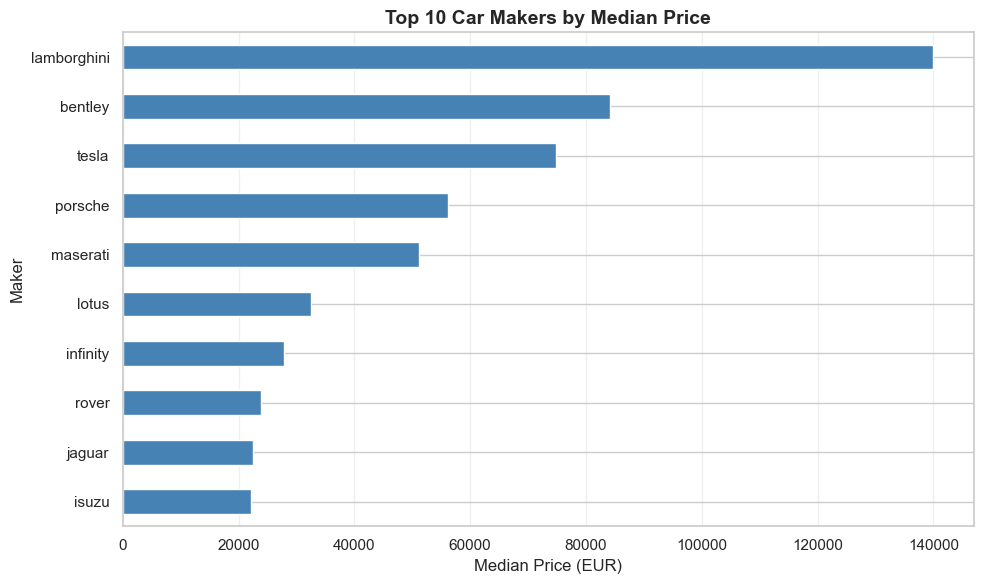

In [19]:
plt.figure(figsize=(10, 6))
median_price_by_maker.sort_values().plot(kind="barh", color="steelblue")

plt.title("Top 10 Car Makers by Median Price", fontsize=14, fontweight="bold")
plt.xlabel("Median Price (EUR)", fontsize=12)
plt.ylabel("Maker", fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



Lamborghini leads at €140K, followed by Bentley (€84K) and Tesla (€75K). Premium brands occupy distinct price tiers above mass-market competitors.


## Visualization – Top 10 Makers by Number of Listings

This visualization highlights the most frequently listed car makers.


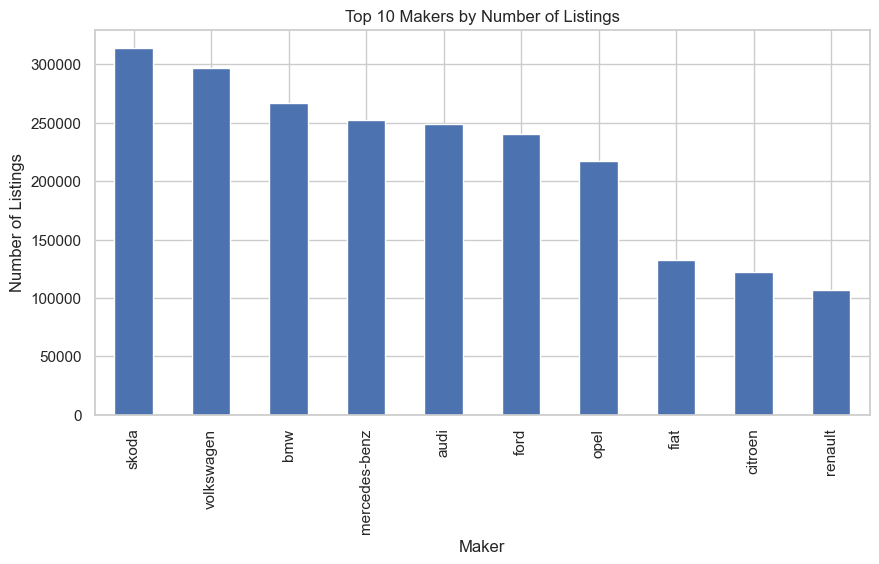

In [20]:
plt.figure(figsize=(10, 5))
listing_count_by_maker.plot(kind="bar")

plt.title("Top 10 Makers by Number of Listings")
plt.xlabel("Maker")
plt.ylabel("Number of Listings")

plt.show()



Clear contrast: volume leaders (Skoda, VW, BMW) are not price leaders. Market availability doesn't correlate with average price.


## Visualization – Price Distribution

Histogram and boxplot show the distribution and concentration of vehicle prices.

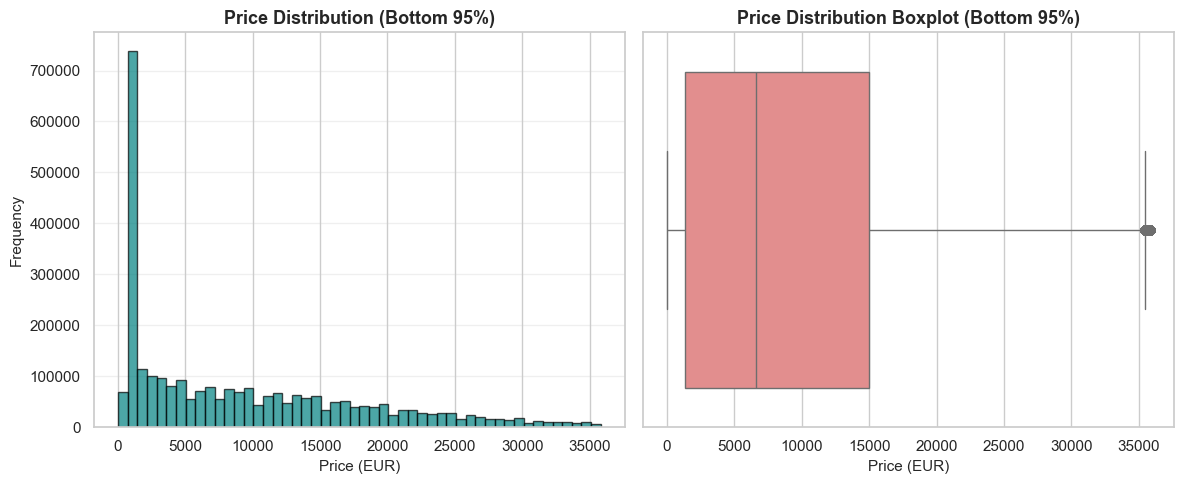

In [21]:
# Focus on the main market (bottom 95%)
price_95_percentile = df["price_eur"].quantile(0.95)
df_filtered = df[df["price_eur"] <= price_95_percentile]

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df_filtered["price_eur"].dropna(), bins=50, color="teal", edgecolor="black", alpha=0.7)
plt.title("Price Distribution (Bottom 95%)", fontsize=13, fontweight="bold")
plt.xlabel("Price (EUR)", fontsize=11)
plt.ylabel("Frequency", fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Boxplot for comparison
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered["price_eur"], color="lightcoral")
plt.title("Price Distribution Boxplot (Bottom 95%)", fontsize=13, fontweight="bold")
plt.xlabel("Price (EUR)", fontsize=11)

plt.tight_layout()
plt.show()



Right-skewed distribution with most vehicles clustered at the lower end. The median is around €6,600, showing the market is dominated by budget and mid-priced vehicles.


## Visualization – Price vs Mileage Relationship

A scatter plot reveals the relationship between vehicle mileage and price.

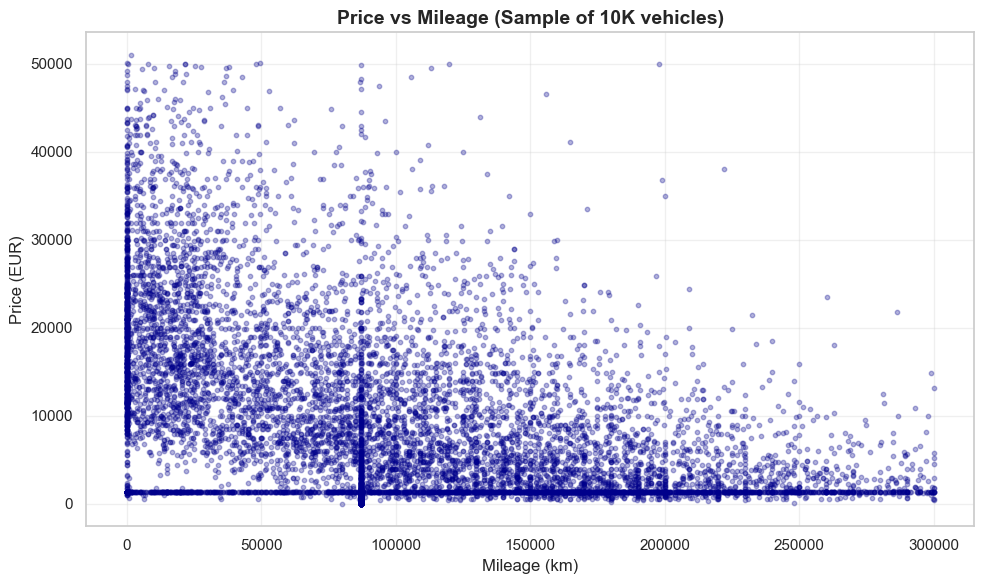

In [22]:
# Focus on main market
price_cap = df["price_eur"].quantile(0.98)
mileage_cap = df["mileage"].quantile(0.98)

df_viz = df[(df["price_eur"] <= price_cap) & (df["mileage"] <= mileage_cap)].copy()

# Sample for visualization performance
df_sample = df_viz.sample(n=min(10000, len(df_viz)), random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(df_sample["mileage"], df_sample["price_eur"], alpha=0.3, s=10, color="darkblue")

plt.title("Price vs Mileage (Sample of 10K vehicles)", fontsize=14, fontweight="bold")
plt.xlabel("Mileage (km)", fontsize=12)
plt.ylabel("Price (EUR)", fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



Negative correlation visible: higher mileage generally means lower prices. However, wide price variation at low mileage suggests other factors (brand, model, age) strongly influence pricing.


## Visualization – Price Distribution by Category (Violin Plot)

A violin plot shows the full distribution shape for each price category.

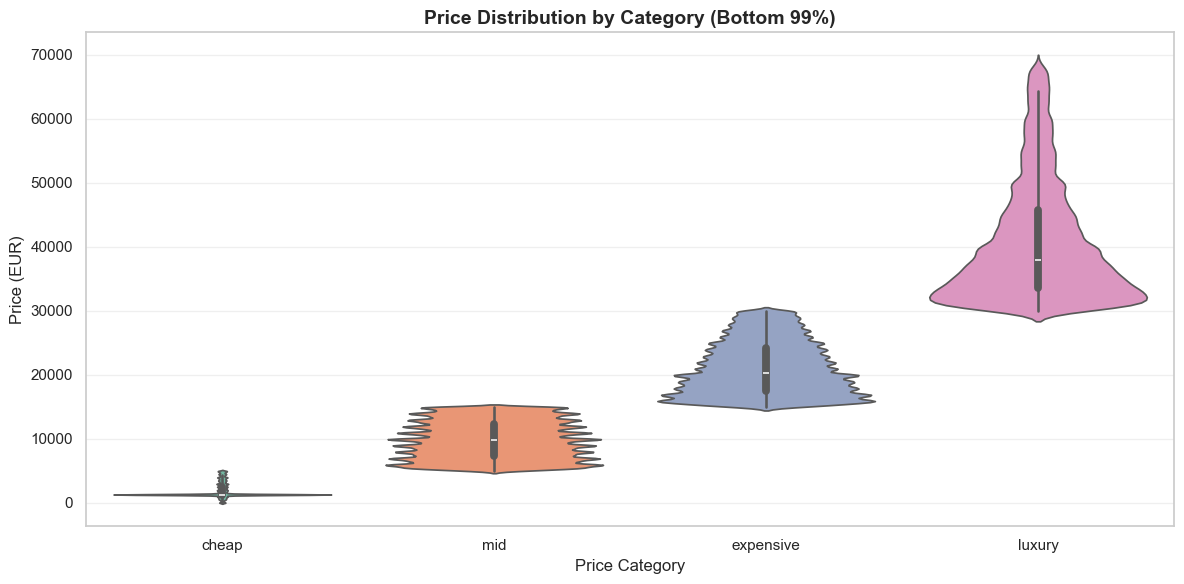

In [23]:
# Prepare data with categories
df_cat_viz = df.dropna(subset=["price_category", "price_eur"]).copy()

# Focus on main market
price_99 = df_cat_viz["price_eur"].quantile(0.99)
df_cat_viz = df_cat_viz[df_cat_viz["price_eur"] <= price_99]

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_cat_viz, x="price_category", y="price_eur", 
               hue="price_category", palette="Set2", 
               order=["cheap", "mid", "expensive", "luxury"], legend=False)

plt.title("Price Distribution by Category (Bottom 99%)", fontsize=14, fontweight="bold")
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Price (EUR)", fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



Each category shows distinct distribution shapes. "Cheap" is tightly clustered, "mid" and "expensive" show wider spread, "luxury" has the broadest range. The violin width shows concentration density at different price points.


## Analysis – Ad Duration by Price Segment

Examining how long vehicles stay listed across different price ranges can reveal market dynamics and buyer behavior.

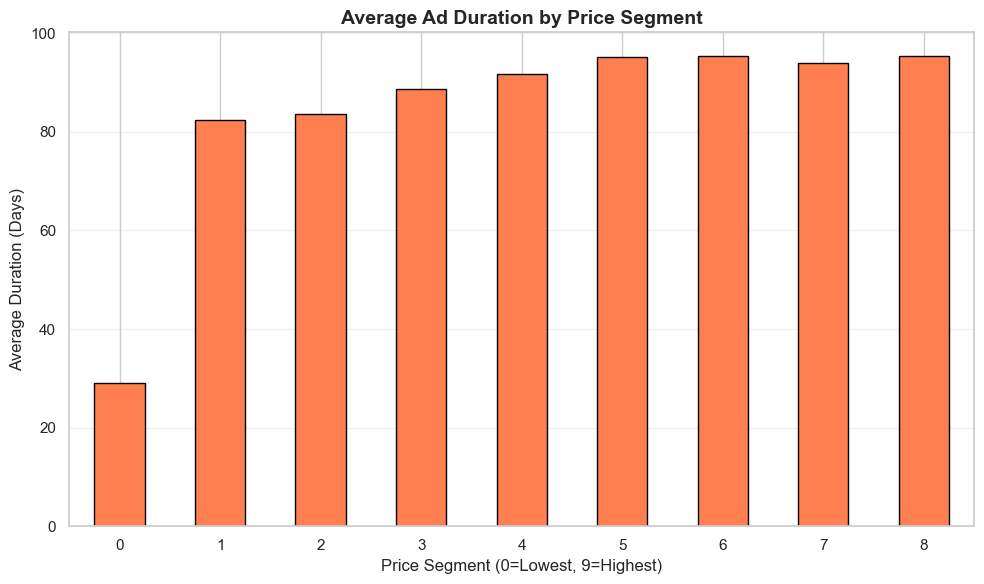

In [24]:
# Only proceed if ad_duration_days exists
if 'ad_duration_days' in df.columns:
    # Create price bins to analyze ad duration patterns
    df["price_bin"] = pd.qcut(df["price_eur"], q=10, labels=False, duplicates="drop")
    
    # Calculate average ad duration by price bin
    avg_duration = df.groupby("price_bin")["ad_duration_days"].mean()
    
    plt.figure(figsize=(10, 6))
    avg_duration.plot(kind="bar", color="coral", edgecolor="black")
    
    plt.title("Average Ad Duration by Price Segment", fontsize=14, fontweight="bold")
    plt.xlabel("Price Segment (0=Lowest, 9=Highest)", fontsize=12)
    plt.ylabel("Average Duration (Days)", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Ad duration feature not available in dataset")


Higher-priced vehicles tend to remain listed longer, indicating slower turnover in the luxury segment. Budget vehicles sell faster, reflecting higher demand and easier financing.

## Visualization – Feature Correlation Heatmap

A correlation heatmap reveals relationships between numerical features, helping identify which variables move together.

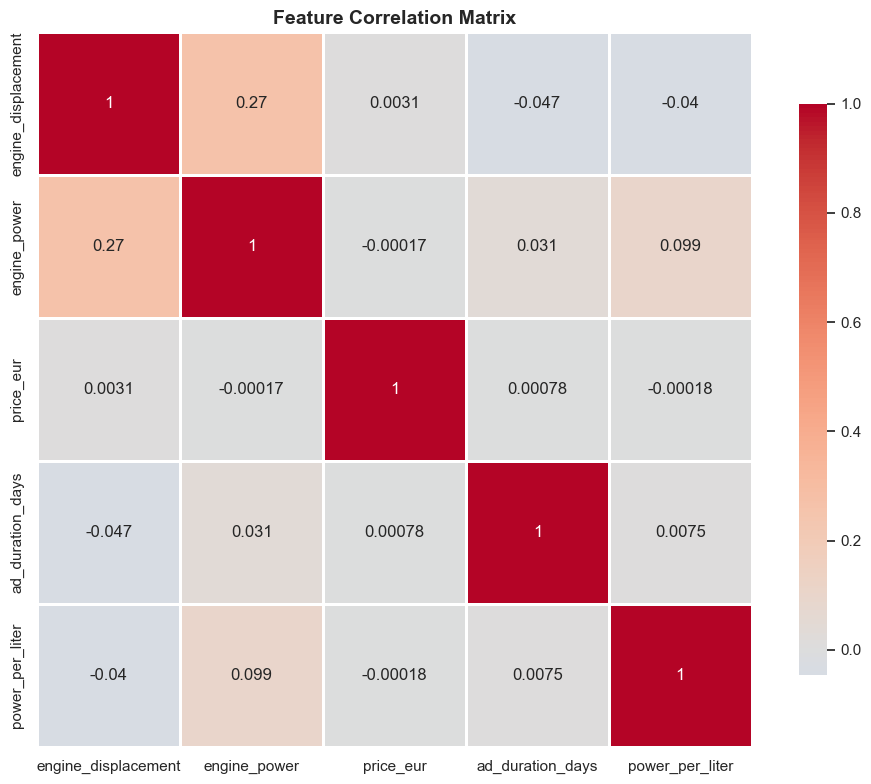

In [25]:
# Select relevant numerical features for correlation analysis
correlation_features = ['engine_displacement', 'engine_power', 'price_eur']

# Add optional features if they exist
if 'ad_duration_days' in df.columns:
    correlation_features.append('ad_duration_days')
if 'power_per_liter' in df.columns:
    correlation_features.append('power_per_liter')

# Calculate correlation matrix
corr = df[correlation_features].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title("Feature Correlation Matrix", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


Engine power and displacement show strong positive correlation, as larger engines typically produce more power. Other features show weaker relationships, suggesting vehicle pricing depends on multiple independent factors.

**Overall Insight:**  
This analysis of real-world vehicle listing data reveals clear market structure. Luxury brands command the highest prices (Lamborghini, Bentley, Tesla), while mass-market brands dominate sales volume (Skoda, VW, Ford). Price categories show distinct segments from €1.3K to €40K. Mileage negatively correlates with price, though brand and model remain strong pricing factors. The dataset demonstrates typical characteristics of real-world data: skewed distributions and the need for robust statistical methods.
